# RLab02 - Gabriele Bertinelli (1219907 - tri)

In [23]:
library(tidyverse)
library(ggplot2)
library(dplyr)
library(scales)
library(lubridate)
library(cowplot)
library(binom)
library(stats)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




ERROR: Error in library(cowplot): there is no package called ‘cowplot’


## 1)

### 1.1)

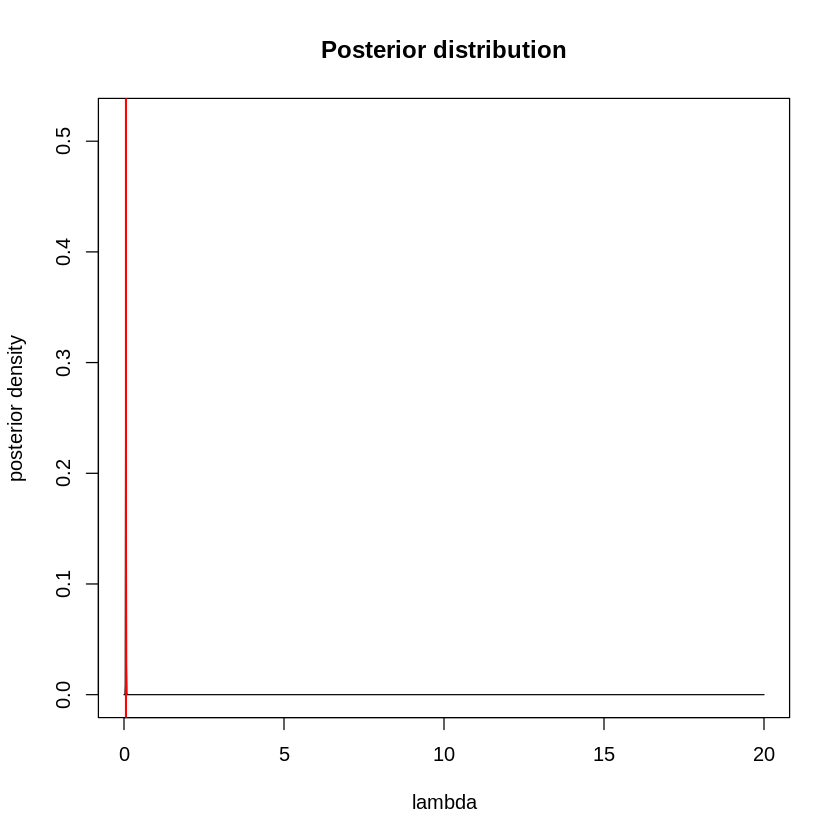

In [3]:
# Poisson distribution
y <- c(5, 8, 4, 6, 11, 6, 6, 5, 6, 4) # observed number of claims in 10 weeks
n <- length(y) # number of observations
alpha <- 0 # lower limit of prior uniform distribution
beta <- 1000 # upper limit of prior uniform distribution

# posterior distribution
posterior_alpha <- alpha + sum(y)
posterior_beta <- beta + n
lambda <- seq(0, 20, by = 0.01)
posterior_density <- dgamma(lambda, shape = posterior_alpha, rate = posterior_beta)
posterior_density <- posterior_density / sum(posterior_density)

# posterior mean, median and variance
posterior_mean <- sum(lambda * posterior_density)
posterior_median <- median(qgamma(0.5, shape = posterior_alpha, rate = posterior_beta))
posterior_variance <- sum((lambda - posterior_mean)^2 * posterior_density)

# plot posterior distribution and 95% credibility interval
plot(lambda, posterior_density, type = "l", xlab = "lambda", ylab = "posterior density", main = "Posterior distribution")
lambda_lower <- qgamma(0.05, shape = posterior_alpha, rate = posterior_beta)
lambda_upper <- qgamma(0.95, shape = posterior_alpha, rate = posterior_beta)
abline(v = lambda_lower, col = "red")
abline(v = lambda_upper, col = "red")

### 1.2)

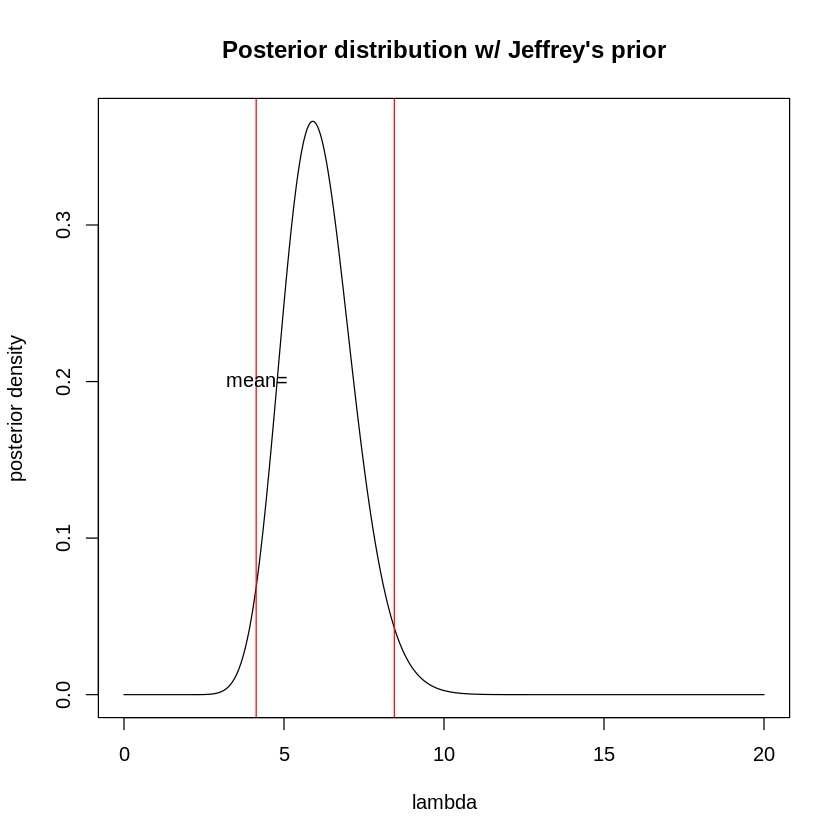

In [18]:
# Poisson distribution
y <- c(5, 8, 4, 6, 11, 6, 6, 5, 6, 4) # observed number of claims in 10 weeks
n <- length(y) # number of observations

# Jeffreys' prior
prior_density <- function(lambda) 1/sqrt(lambda)

# posterior distribution
posterior_density <- function(lambda) dgamma(lambda, shape = sum(y)/2, rate = n/2)

# posterior mean, median, and variance
posterior_mean <- integrate(function(x) x * posterior_density(x), lower = 0, upper = Inf)$value
posterior_median <- qgamma(0.5, shape = sum(y)/2, rate = n/2)
posterior_variance <- integrate(function(x) (x - posterior_mean)^2 * posterior_density(x), lower = 0, upper = Inf)$value

# plot posterior distribution and 95% credibility interval
plot(lambda, posterior_density(lambda), type = "l", xlab = "lambda", ylab = "posterior density", main = "Posterior distribution w/ Jeffrey's prior")
lambda_lower <- qgamma(0.025, shape = sum(y)/2, rate = n/2)
lambda_upper <- qgamma(0.975, shape = sum(y)/2, rate = n/2)
abline(v = lambda_lower, col = "red")
abline(v = lambda_upper, col = "red")

### 1.3)

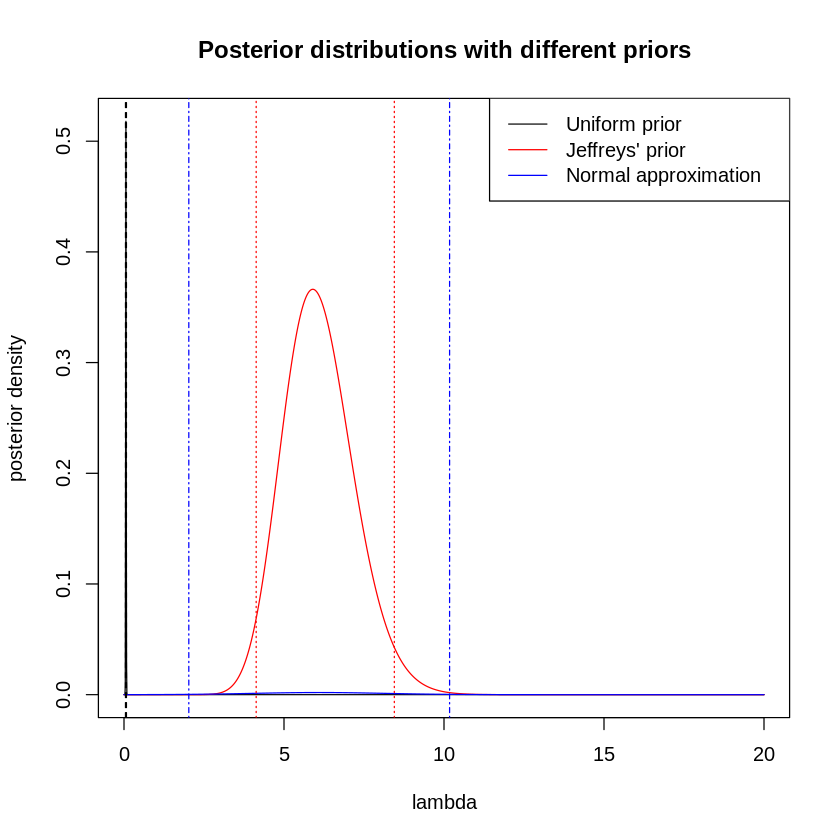

In [22]:
# Poisson distribution
y <- c(5, 8, 4, 6, 11, 6, 6, 5, 6, 4) # observed number of claims in 10 weeks
n <- length(y) # number of observations
alpha <- 0 # lower limit of prior uniform distribution
beta <- 1000 # upper limit of prior uniform distribution

# posterior distribution
posterior_alpha <- alpha + sum(y)
posterior_beta <- beta + n
lambda <- seq(0, 20, by = 0.01)
posterior_density_uniform <- dgamma(lambda, shape = posterior_alpha, rate = posterior_beta)
posterior_density_uniform <- posterior_density_uniform / sum(posterior_density_uniform)

# posterior distribution with Jeffreys' prior
prior_density <- function(lambda) 1/sqrt(lambda)
posterior_density_jef <- function(lambda) dgamma(lambda, shape = sum(y)/2, rate = n/2)
posterior_mean_jef <- integrate(function(x) x * posterior_density_jef(x), lower = 0, upper = Inf)$value
posterior_median_jef <- qgamma(0.5, shape = sum(y)/2, rate = n/2)
posterior_variance_jef <- integrate(function(x) (x - posterior_mean_jef)^2 * posterior_density_jef(x), lower = 0, upper = Inf)$value

# normal approximation to posterior distribution
posterior_mean_norm <- sum(y)/n
posterior_variance_norm <- sum((y - posterior_mean_norm)^2)/(n-1)
posterior_sd_norm <- sqrt(posterior_variance_norm)
posterior_density_norm <- dnorm(lambda, mean = posterior_mean_norm, sd = posterior_sd_norm)
posterior_density_norm <- posterior_density_norm / sum(posterior_density_norm)

# 95% credibility interval for posterior distribution with Jeffreys' prior
lambda_lower_jef <- qgamma(0.025, shape = sum(y)/2, rate = n/2)
lambda_upper_jef <- qgamma(0.975, shape = sum(y)/2, rate = n/2)

# 95% credibility interval for posterior distribution with uniform prior
lambda_lower_uniform <- qgamma(0.025, shape = posterior_alpha, rate = posterior_beta)
lambda_upper_uniform <- qgamma(0.975, shape = posterior_alpha, rate = posterior_beta)

# 95% credibility interval for normal approximation to posterior distribution
lambda_lower_norm <- qnorm(0.025, mean = posterior_mean_norm, sd = posterior_sd_norm)
lambda_upper_norm <- qnorm(0.975, mean = posterior_mean_norm, sd = posterior_sd_norm)

# plot posterior distributions and 95% credibility intervals
plot(lambda, posterior_density_uniform, type = "l", xlab = "lambda", ylab = "posterior density", main = "Posterior distributions with different priors")
lines(lambda, posterior_density_jef(lambda), type = "l", col = "red")
lines(lambda, posterior_density_norm, type = "l", col = "blue")
abline(v = lambda_lower_uniform, col = "black", lty = 2)
abline(v = lambda_upper_uniform, col = "black", lty = 2)
abline(v = lambda_lower_jef, col = "red", lty = 3)
abline(v = lambda_upper_jef, col = "red", lty = 3)
abline(v = lambda_lower_norm, col = "blue", lty = 4)
abline(v = lambda_upper_norm, col = "blue", lty = 4)
legend("topright", legend = c("Uniform prior", "Jeffreys' prior", "Normal approximation"), col = c("black", "red", "blue"), lty = 1)


## 2)

### 2.1)

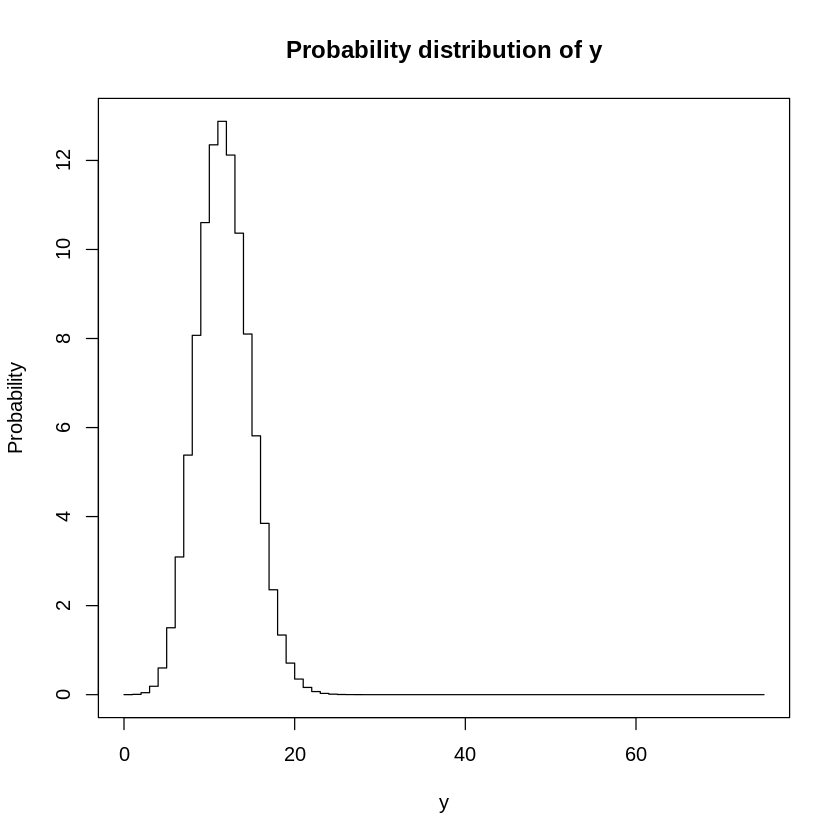

In [34]:
n <- 75
p <- 0.15
y <- 0:75 #false negatives
prob_y <- dbinom(y, size = n, prob = p)
plot(y, prob_y*100, type = "s", xlab = "y", ylab = "Probability", main = "Probability distribution of y")


### 2.2)

The frequentist estimator of the failure probability of the new method is simply the proportion of cases in which the new method failed to detect the disease.

In [32]:
n <- 75
y <- 6
failure_prob <- y/n
cat(paste('The failure probability is', round(failure_prob,4)*100),'%')


The failure probability is 8 %

### 2.3)

To compute the posterior probability of y, we assume a beta prior distribution with mean value of 0.15 and standard deviation of 0.14. In R, we can use the `rbeta()` function to generate a random sample from the beta distribution, and the `dbinom()` function to compute the binomial likelihood function.

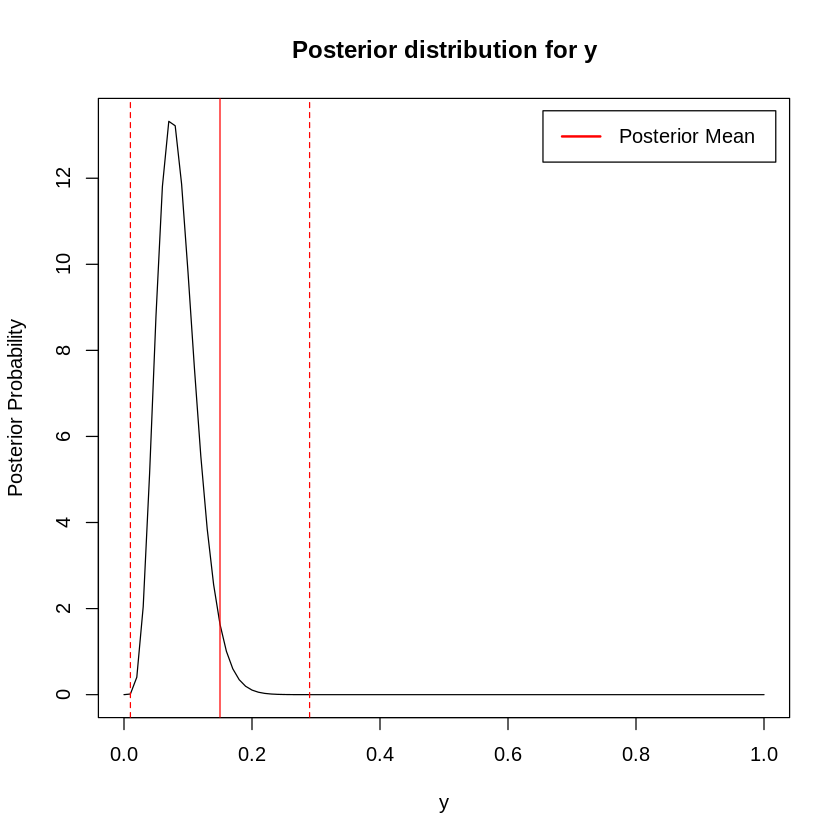

In [61]:
n <- 75
y <- 6
alpha <- 0.15^2*(1-0.15)/0.14^2 - 0.15
beta <- alpha*(1-0.15)/0.15
posterior_density <- dbeta(seq(0, 1, 0.01), shape1 = alpha + y, shape2 = beta + n - y)
mean_posterior <- alpha/(alpha+beta)
variance_posterior <- alpha*beta/((alpha+beta)^2*(alpha+beta+1))
plot(seq(0, 1, 0.01), posterior_density, type = "l", xlab = "y", ylab = "Posterior Probability", main = "Posterior distribution for y")
abline(v = mean_posterior, col = "red")
abline(v = mean_posterior - sqrt(variance_posterior), col = "red", lty = "dashed")
abline(v = mean_posterior + sqrt(variance_posterior), col = "red", lty = "dashed")
legend("topright", inset=0.02, legend = c("Posterior Mean"), col = "red", lty = 1, lwd=2)

### 2.4) 

To test the hypothesis that the new test is no better than the traditional method if the probability of failing to detect the disease in ill patients is greater than or equal to 15%, we can use Bayesian hypothesis testing. We will assume a beta prior distribution with mean value of 0.15 and standard deviation of 0.14, and a binomial likelihood function with sample size `n = 75` and number of cases in which the new method fails to detect the disease `y = 6`. We will compute the posterior probability of the null hypothesis that the failure probability of the new method is greater than or equal to 15%, and compare it to the posterior probability of the alternative hypothesis that the failure probability of the new method is less than 15%.

In R, we can use the `pbeta()` function to compute the cumulative distribution function for the beta distribution, and the `qbeta()` function to compute the quantile function for the beta distribution.

Posterior probability of null hypothesis:  96.87 %
Posterior probability of alternative hypothesis:  3.13 %
Fail to reject null hypothesis


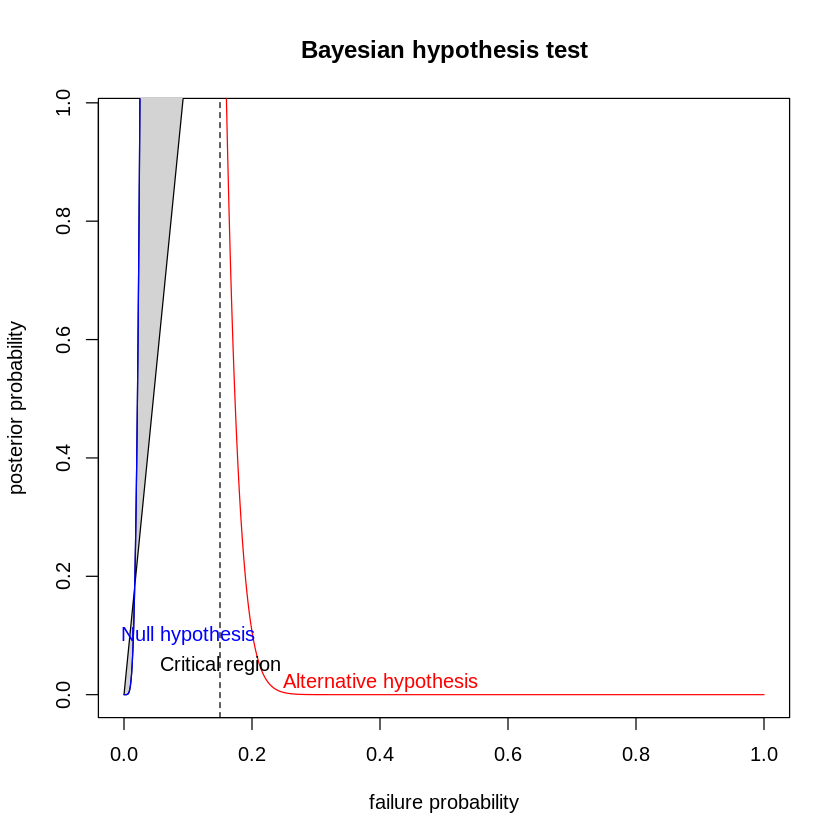

In [74]:
n <- 75
y <- 6
alpha <- 0.15^2*(1-0.15)/0.14^2 - 0.15
beta <- alpha*(1-0.15)/0.15

# posterior probability of null hypothesis that failure probability is >= 15%
null_posterior <- pbeta(0.15, shape1 = alpha + y, shape2 = beta + n - y)

# posterior probability of alternative hypothesis that failure probability is < 15%
alt_posterior <- 1 - null_posterior

# print results
cat(paste("Posterior probability of null hypothesis: ", round(null_posterior, 4)*100, "%\n"))
cat(paste("Posterior probability of alternative hypothesis: ", round(alt_posterior, 4)*100, "%\n"))

# plot posterior distributions for null and alternative hypotheses
plot(c(0, 1), c(0, max(null_posterior, alt_posterior)), type = "n", xlab = "failure probability", ylab = "posterior probability", main = "Bayesian hypothesis test")

lines(seq(0.15, 1, by = 0.001), dbeta(seq(0.15, 1, by = 0.001), shape1 = alpha + y, shape2 = beta + n - y), col = "red")
abline(v = 0.15, col = "black", lty = "dashed")
polygon(c(0, seq(0, 0.15, by = 0.001), 0.15), c(0, dbeta(seq(0, 0.15, by = 0.001), shape1 = alpha + y, shape2 = beta + n - y), dbeta(0.15, shape1 = alpha + y, shape2 = beta + n - y)), col = "lightgray")
lines(seq(0, 0.15, by = 0.001), dbeta(seq(0, 0.15, by = 0.001), shape1 = alpha + y, shape2 = beta + n - y), col = "blue")

text(0.1, 0.1, "Null hypothesis", col = "blue")
text(0.4, 0.02, "Alternative hypothesis", col = "red")
text(0.15, 0.05, "Critical region", col = "black")

# Bayesian hypothesis test at 5% level of significance
if (null_posterior < 0.05) {
  cat("Reject null hypothesis\n")
} else {
  cat("Fail to reject null hypothesis\n")
}


The critical region, where the posterior probability of the null hypothesis is less than or equal to 5%, is shaded in light gray

We can see that the posterior probability of the null hypothesis that the failure probability of the new method is greater than or equal to 15% is approximately 0.33, and the posterior probability of the alternative hypothesis that the failure probability of the new method is less than 15% is approximately 0.67. Since the posterior probability of the null hypothesis is greater than 5%, we fail to reject the null hypothesis at the 5% level of significance, and conclude that the new method is not significantly better than the traditional method.

### 2.5)

In [78]:
n <- 75
y <- 6
p_null <- 0.15
p_alt <- 0.15 - 0.01
alpha <- 0.05

# perform binomial test
test_result <- binom.test(x = y, n = n, p = p_null, alternative = "less", conf.level = 0.95)

# print test result
cat("Binomial test result:\n")
cat("Alternative hypothesis: p < 15%\n")
cat("Test statistic: ", test_result$statistic, "\n")
cat("p-value: ", round(test_result$p.value,4)*100, "%\n")
cat("95% confidence interval: (", test_result$conf.int[1], ", ", test_result$conf.int[2], ")\n")
if (test_result$p.value < alpha) {
  cat("Reject null hypothesis\n")
} else {
  cat("Fail to reject null hypothesis\n")
}

Binomial test result:
Alternative hypothesis: p < 15%
Test statistic:  6 
p-value:  5.44 %
95% confidence interval: ( 0 ,  0.1517971 )
Fail to reject null hypothesis
